In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [118]:
df = pd.read_json("E:/DataScience_Study/Aegis/Term-1/Project-Sessions/Bhavik Gandhi_ML/Proj-3_Text_Classification/news-category-dataset/News_Category_Dataset_v2.json", lines=True)


In [172]:
pd.set_option('display.max_colwidth', -1)
df.head(7)

,authors,category,date,headline,short_description
0,Melissa Jeltsen,CRIME,2018-05-26,"There Were 2 Mass Shootings In Texas Last Week, But Only 1 On TV",She left her husband. He killed their children. Just another day in America.
1,Andy McDonald,ENTERTAINMENT,2018-05-26,Will Smith Joins Diplo And Nicky Jam For The 2018 World Cup's Official Song,Of course it has a song.
2,Ron Dicker,ENTERTAINMENT,2018-05-26,Hugh Grant Marries For The First Time At Age 57,The actor and his longtime girlfriend Anna Eberstein tied the knot in a civil ceremony.
3,Ron Dicker,ENTERTAINMENT,2018-05-26,Jim Carrey Blasts 'Castrato' Adam Schiff And Democrats In New Artwork,The actor gives Dems an ass-kicking for not fighting hard enough against Donald Trump.
4,Ron Dicker,ENTERTAINMENT,2018-05-26,Julianna Margulies Uses Donald Trump Poop Bags To Pick Up After Her Dog,"The ""Dietland"" actress said using the bags is a ""really cathartic, therapeutic moment."""
5,Ron Dicker,ENTERTAINMENT,2018-05-26,Morgan Freeman 'Devastated' That Sexual Harassment Claims Could Undermine Legacy,"""It is not right to equate horrific incidents of sexual assault with misplaced compliments or humor,"" he said in a statement."
6,Ron Dicker,ENTERTAINMENT,2018-05-26,Donald Trump Is Lovin' New McDonald's Jingle In 'Tonight Show' Bit,"It's catchy, all right."


In [120]:
df.drop('link', inplace=True, axis=1)

In [177]:
df.shape

(148983, 5)

In [79]:
#df['authors'].replace('', np.nan, inplace=True)

In [82]:
#df['authors'].replace(' ', np.nan, inplace=True)

In [173]:
df['headline'].replace('', np.nan, inplace=True)
df['short_description'].replace('', np.nan, inplace=True)
df['authors'].replace('', np.nan, inplace=True)

In [176]:
df.isna().sum()

authors              0
category             0
date                 0
headline             0
short_description    0
dtype: int64

In [175]:
df.dropna(subset=['headline'], inplace=True)
df.dropna(subset=['short_description'], inplace=True)
df.dropna(subset=['authors'], inplace=True)

In [178]:
df_orignial = df.copy()

In [179]:
import nltk
print('NTLK version: %s' % (nltk.__version__))

from nltk import word_tokenize, pos_tag, ne_chunk
nltk.download('words')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.download('maxent_ne_chunker')

NTLK version: 3.3
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\ikd\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ikd\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ikd\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\ikd\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!


True

In [180]:
df_orignial['headline'] = df_orignial['headline'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
df_orignial['headline'] = df_orignial['headline'].apply(lambda x: ' '.join([w for w in x.split() if w.isalpha()]))
df_orignial['headline'] = df_orignial['headline'].apply(lambda x : x.lower().split())
df_orignial['headline'].head(5)


0    [there, were, mass, shootings, texas, last, only]                  
1    [will, smith, joins, diplo, nicky, world, official, song]          
2    [hugh, grant, marries, first, time]                                
3    [carrey, blasts, adam, schiff, democrats, artwork]                 
4    [julianna, margulies, uses, donald, trump, poop, bags, pick, after]
Name: headline, dtype: object

In [181]:
df_orignial['short_description'] = df_orignial['short_description'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
df_orignial['short_description'] = df_orignial['short_description'].apply(lambda x: ' '.join([w for w in x.split() if w.isalpha()]))
df_orignial['short_description'] = df_orignial['short_description'].apply(lambda x: x.lower().split())
df_orignial['short_description'].head(5)

0    [left, killed, their, just, another]                             
1    [course]                                                         
2    [actor, longtime, girlfriend, anna, eberstein, tied, knot, civil]
3    [actor, gives, dems, fighting, hard, enough, against, donald]    
4    [actress, said, using, bags, therapeutic]                        
Name: short_description, dtype: object

In [182]:
from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()

In [183]:
#df_orignial['headline'] = df_orignial['headline'].apply(lambda x: [porter.stem(i) for i in x])

#df_orignial.headline.head(7)

In [184]:
from nltk.stem import WordNetLemmatizer 
  
lemmatizer = WordNetLemmatizer() 
  
print("rocks :", lemmatizer.lemmatize("rocks")) 
print("corpora :", lemmatizer.lemmatize("corpora")) 
  
# a denotes adjective in "pos" 
print("better :", lemmatizer.lemmatize("better", pos ="a")) 

rocks : rock
corpora : corpus
better : good


In [185]:
df_orignial['headline'] = df_orignial['headline'].apply(lambda x: [lemmatizer.lemmatize(i) for i in x])
df_orignial.headline.head(7)

0    [there, were, mass, shooting, texas, last, only]                            
1    [will, smith, join, diplo, nicky, world, official, song]                    
2    [hugh, grant, marries, first, time]                                         
3    [carrey, blast, adam, schiff, democrat, artwork]                            
4    [julianna, margulies, us, donald, trump, poop, bag, pick, after]            
5    [morgan, freeman, that, sexual, harassment, claim, could, undermine, legacy]
6    [donald, trump, jingle]                                                     
Name: headline, dtype: object

In [186]:
df_orignial['short_description'] = df_orignial['short_description'].apply(lambda x: [lemmatizer.lemmatize(i) for i in x])
df_orignial['short_description'].head(7)

0    [left, killed, their, just, another]                                                   
1    [course]                                                                               
2    [actor, longtime, girlfriend, anna, eberstein, tied, knot, civil]                      
3    [actor, give, dems, fighting, hard, enough, against, donald]                           
4    [actress, said, using, bag, therapeutic]                                               
5    [right, equate, horrific, incident, sexual, assault, with, misplaced, compliment, said]
6    []                                                                                     
Name: short_description, dtype: object

In [187]:
df['headline'].replace('', np.nan, inplace=True)
df['short_description'].replace('', np.nan, inplace=True)

df.dropna(subset=['headline'], inplace=True)
df.dropna(subset=['short_description'], inplace=True)

In [188]:
df_orignial.shape

(148983, 5)

In [189]:
import nltk
from nltk.corpus import stopwords
set(stopwords.words('english'))

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [190]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
  
example_sent = "This is a sample sentence, showing off the stop words filtration."
  
stop_words = set(stopwords.words('english')) 
  
word_tokens = word_tokenize(example_sent) 
  
filtered_sentence = [w for w in word_tokens if not w in stop_words] 
  
filtered_sentence = [] 
  
for w in word_tokens: 
    if w not in stop_words: 
        filtered_sentence.append(w) 
  
print(word_tokens) 
print(filtered_sentence)

['This', 'is', 'a', 'sample', 'sentence', ',', 'showing', 'off', 'the', 'stop', 'words', 'filtration', '.']
['This', 'sample', 'sentence', ',', 'showing', 'stop', 'words', 'filtration', '.']


In [191]:
stop_words = set(stopwords.words('english'))
#word_tokens = word_tokenize(df_orignial['headline'])

df_orignial['headline'] = df_orignial['headline'].apply(lambda x: [item for item in x if item not in stop_words])
df_orignial['headline'].head(7)

0    [mass, shooting, texas, last]                                         
1    [smith, join, diplo, nicky, world, official, song]                    
2    [hugh, grant, marries, first, time]                                   
3    [carrey, blast, adam, schiff, democrat, artwork]                      
4    [julianna, margulies, us, donald, trump, poop, bag, pick]             
5    [morgan, freeman, sexual, harassment, claim, could, undermine, legacy]
6    [donald, trump, jingle]                                               
Name: headline, dtype: object

In [192]:
df_orignial['short_description'] = df_orignial['short_description'].apply(lambda x: [item for item in x if item not in stop_words])
df_orignial['short_description'].head(7)

0    [left, killed, another]                                                          
1    [course]                                                                         
2    [actor, longtime, girlfriend, anna, eberstein, tied, knot, civil]                
3    [actor, give, dems, fighting, hard, enough, donald]                              
4    [actress, said, using, bag, therapeutic]                                         
5    [right, equate, horrific, incident, sexual, assault, misplaced, compliment, said]
6    []                                                                               
Name: short_description, dtype: object

In [193]:
df_orignial.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148983 entries, 0 to 200848
Data columns (total 5 columns):
authors              148983 non-null object
category             148983 non-null object
date                 148983 non-null datetime64[ns]
headline             148983 non-null object
short_description    148983 non-null object
dtypes: datetime64[ns](1), object(4)
memory usage: 6.8+ MB


In [124]:
#df_filter = df_orignial[df_orignial['category'].count() > 4000]

In [194]:
df_orignial.groupby('category')['category'].count().sort_values(ascending=False)

category
POLITICS          26913
WELLNESS          12827
ENTERTAINMENT     12192
TRAVEL            8011 
STYLE & BEAUTY    7111 
PARENTING         6408 
HEALTHY LIVING    5072 
QUEER VOICES      4669 
FOOD & DRINK      4413 
BUSINESS          4320 
COMEDY            3709 
PARENTS           3491 
SPORTS            3445 
HOME & LIVING     3398 
BLACK VOICES      3260 
IMPACT            2920 
WOMEN             2840 
THE WORLDPOST     2198 
MEDIA             1976 
CRIME             1960 
TASTE             1891 
WEIRD NEWS        1890 
WORLD NEWS        1824 
RELIGION          1761 
WEDDINGS          1703 
DIVORCE           1695 
GREEN             1682 
TECH              1659 
STYLE             1535 
MONEY             1492 
SCIENCE           1404 
ARTS & CULTURE    1307 
WORLDPOST         1242 
FIFTY             1042 
GOOD NEWS         917  
EDUCATION         885  
LATINO VOICES     877  
ARTS              863  
COLLEGE           860  
ENVIRONMENT       670  
CULTURE & ARTS    651  
Name: c

In [195]:
#Number of articles published by month
df_orignial['date'] = pd.to_datetime(df_orignial['date'], errors='coerce')
df_orignial.groupby(pd.Grouper(key='date', freq='M'))['date'].count().sort_values(ascending=False)

date
2017-05-31    2615
2017-01-31    2575
2017-06-30    2519
2017-03-31    2493
2017-08-31    2493
2016-10-31    2467
2017-04-30    2450
2016-11-30    2405
2017-07-31    2381
2017-02-28    2366
2016-08-31    2341
2016-12-31    2335
2016-07-31    2312
2016-09-30    2306
2017-10-31    2304
2017-09-30    2230
2015-10-31    2229
2012-03-31    2204
2013-12-31    2170
2017-11-30    2163
2015-07-31    2145
2014-01-31    2136
2015-09-30    2116
2012-10-31    2105
2015-08-31    2103
2016-03-31    2101
2015-11-30    2097
2012-02-29    2085
2014-03-31    2065
2016-01-31    2063
              ... 
2013-11-30    1951
2012-09-30    1934
2013-07-31    1932
2012-06-30    1929
2016-04-30    1882
2016-05-31    1879
2013-08-31    1850
2014-04-30    1833
2013-09-30    1833
2013-02-28    1820
2013-06-30    1760
2018-03-31    1755
2018-02-28    1638
2015-05-31    1593
2015-06-30    1574
2018-04-30    1557
2014-12-31    1535
2015-04-30    1502
2015-03-31    1469
2014-10-31    1439
2015-02-28    1370
2018-05

In [196]:
#Average articles per month
df_orignial.groupby(pd.Grouper(key='date', freq='M'))['date'].count().mean()

1934.844155844156

In [197]:
#Popular category per month
df_orignial.groupby(pd.Grouper(key='date', freq='M'))['category'].agg(lambda x:x.value_counts().index[0])

date
2012-01-31    STYLE & BEAUTY
2012-02-29    STYLE & BEAUTY
2012-03-31    STYLE & BEAUTY
2012-04-30    WELLNESS      
2012-05-31    WELLNESS      
2012-06-30    WELLNESS      
2012-07-31    WELLNESS      
2012-08-31    WELLNESS      
2012-09-30    WELLNESS      
2012-10-31    WELLNESS      
2012-11-30    WELLNESS      
2012-12-31    WELLNESS      
2013-01-31    WELLNESS      
2013-02-28    WELLNESS      
2013-03-31    WELLNESS      
2013-04-30    WELLNESS      
2013-05-31    WELLNESS      
2013-06-30    WELLNESS      
2013-07-31    WELLNESS      
2013-08-31    WELLNESS      
2013-09-30    WELLNESS      
2013-10-31    WELLNESS      
2013-11-30    WELLNESS      
2013-12-31    WELLNESS      
2014-01-31    WELLNESS      
2014-02-28    WELLNESS      
2014-03-31    WELLNESS      
2014-04-30    WELLNESS      
2014-05-31    HEALTHY LIVING
2014-06-30    POLITICS      
                ...         
2015-12-31    POLITICS      
2016-01-31    POLITICS      
2016-02-29    POLITICS      
2016-03-3

In [198]:
df_orignial['hd_short']=df_orignial['headline']+df_orignial['short_description']

In [199]:
df_orignial['hd_short']  = df_orignial['hd_short'] .apply(lambda x: ','.join(map(str, x)))


In [200]:
df_orignial.head(7)

,authors,category,date,headline,short_description,hd_short
0,Melissa Jeltsen,CRIME,2018-05-26,"[mass, shooting, texas, last]","[left, killed, another]","mass,shooting,texas,last,left,killed,another"
1,Andy McDonald,ENTERTAINMENT,2018-05-26,"[smith, join, diplo, nicky, world, official, song]",[course],"smith,join,diplo,nicky,world,official,song,course"
2,Ron Dicker,ENTERTAINMENT,2018-05-26,"[hugh, grant, marries, first, time]","[actor, longtime, girlfriend, anna, eberstein, tied, knot, civil]","hugh,grant,marries,first,time,actor,longtime,girlfriend,anna,eberstein,tied,knot,civil"
3,Ron Dicker,ENTERTAINMENT,2018-05-26,"[carrey, blast, adam, schiff, democrat, artwork]","[actor, give, dems, fighting, hard, enough, donald]","carrey,blast,adam,schiff,democrat,artwork,actor,give,dems,fighting,hard,enough,donald"
4,Ron Dicker,ENTERTAINMENT,2018-05-26,"[julianna, margulies, us, donald, trump, poop, bag, pick]","[actress, said, using, bag, therapeutic]","julianna,margulies,us,donald,trump,poop,bag,pick,actress,said,using,bag,therapeutic"
5,Ron Dicker,ENTERTAINMENT,2018-05-26,"[morgan, freeman, sexual, harassment, claim, could, undermine, legacy]","[right, equate, horrific, incident, sexual, assault, misplaced, compliment, said]","morgan,freeman,sexual,harassment,claim,could,undermine,legacy,right,equate,horrific,incident,sexual,assault,misplaced,compliment,said"
6,Ron Dicker,ENTERTAINMENT,2018-05-26,"[donald, trump, jingle]",[],"donald,trump,jingle"


In [90]:
#from sklearn.feature_extraction.text import TfidfVectorizer
#from sklearn.model_selection import train_test_split

#X_train, ytrain, X_test, ytest = train_test_split(df_orignial['hd_short'], df_orignial['category'], random_state=52)

In [94]:
#!pip install textblob

You are using pip version 19.0.3, however version 19.1.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [201]:
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble

import pandas, xgboost, numpy, textblob, string
from keras.preprocessing import text, sequence
from keras import layers, models, optimizers

In [202]:
import re
s = "Akshay Shahaji Nimbalkar"
ans = re.findall('[A-Za-z]+\s[A-Za-z]+',s)
ans

['Akshay Shahaji']

In [203]:
#def collect_name(x):
#    return re.findall('[A-Za-z]+\s[A-Za-z]+', x)


#y = df_orignial['authors'].apply(lambda x: collect_name(x))
df_orignial['writers'] = df_orignial['authors'].str.split(" ").str[:2]

df_orignial['writers']  = df_orignial['writers'] .apply(lambda x: ','.join(map(str, x)))


In [204]:
df_orignial['hd_short'] = df_orignial['writers'] + df_orignial['hd_short'] 


In [205]:
def replace_comma(x):
    return x.replace(",", " ")

df_orignial['hd_short'] = df_orignial['hd_short'].apply(lambda x: replace_comma(x))
df_orignial['hd_short'] = df_orignial['hd_short'].apply(lambda x: x.lower())

In [206]:
df_original = df_orignial[df_orignial['hd_short'] != ""]

df_original.shape

(148983, 7)

In [207]:
df_orignial.head(10)

,authors,category,date,headline,short_description,hd_short,writers
0,Melissa Jeltsen,CRIME,2018-05-26,"[mass, shooting, texas, last]","[left, killed, another]",melissa jeltsenmass shooting texas last left killed another,"Melissa,Jeltsen"
1,Andy McDonald,ENTERTAINMENT,2018-05-26,"[smith, join, diplo, nicky, world, official, song]",[course],andy mcdonaldsmith join diplo nicky world official song course,"Andy,McDonald"
2,Ron Dicker,ENTERTAINMENT,2018-05-26,"[hugh, grant, marries, first, time]","[actor, longtime, girlfriend, anna, eberstein, tied, knot, civil]",ron dickerhugh grant marries first time actor longtime girlfriend anna eberstein tied knot civil,"Ron,Dicker"
3,Ron Dicker,ENTERTAINMENT,2018-05-26,"[carrey, blast, adam, schiff, democrat, artwork]","[actor, give, dems, fighting, hard, enough, donald]",ron dickercarrey blast adam schiff democrat artwork actor give dems fighting hard enough donald,"Ron,Dicker"
4,Ron Dicker,ENTERTAINMENT,2018-05-26,"[julianna, margulies, us, donald, trump, poop, bag, pick]","[actress, said, using, bag, therapeutic]",ron dickerjulianna margulies us donald trump poop bag pick actress said using bag therapeutic,"Ron,Dicker"
5,Ron Dicker,ENTERTAINMENT,2018-05-26,"[morgan, freeman, sexual, harassment, claim, could, undermine, legacy]","[right, equate, horrific, incident, sexual, assault, misplaced, compliment, said]",ron dickermorgan freeman sexual harassment claim could undermine legacy right equate horrific incident sexual assault misplaced compliment said,"Ron,Dicker"
6,Ron Dicker,ENTERTAINMENT,2018-05-26,"[donald, trump, jingle]",[],ron dickerdonald trump jingle,"Ron,Dicker"
7,Todd Van Luling,ENTERTAINMENT,2018-05-26,"[watch, amazon, prime, week]","[great, joining]",todd vanwatch amazon prime week great joining,"Todd,Van"
8,Andy McDonald,ENTERTAINMENT,2018-05-26,"[mike, myers, reveals, fourth, austin, power, film]","[kid, pushing, film]",andy mcdonaldmike myers reveals fourth austin power film kid pushing film,"Andy,McDonald"
9,Todd Van Luling,ENTERTAINMENT,2018-05-26,"[watch, hulu, week]","[getting, recent, academy]",todd vanwatch hulu week getting recent academy,"Todd,Van"


In [208]:
# split the dataset into training and validation datasets 
X = df_orignial['hd_short']
y = df_orignial['category']


train_x, valid_x, train_y, valid_y = model_selection.train_test_split(X, y)

# label encode the target variable 
encoder = preprocessing.LabelEncoder()

train_y = encoder.fit_transform(train_y)
valid_y = encoder.fit_transform(valid_y)

# Feature Engineering

In [225]:
# create a count vectorizer object 

count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')
count_vect.fit(X)

# transform the training and validation data using count vectorizer object
xtrain_count =  count_vect.transform(train_x)
xvalid_count =  count_vect.transform(valid_x)

#print("Count vectorizer",xtrain_count, xvalid_count)
xtrain_count.shape

(111737, 122615)

In [210]:
# word level tf-idf
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=5000)
tfidf_vect.fit(X)

xtrain_tfidf =  tfidf_vect.transform(train_x)
xvalid_tfidf =  tfidf_vect.transform(valid_x)
#print("word level tf-idf",xtrain_tfidf, xvalid_tfidf)

# ngram level tf-idf 
tfidf_vect_ngram = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=5000)
tfidf_vect_ngram.fit(X)

xtrain_tfidf_ngram =  tfidf_vect_ngram.transform(train_x)
xvalid_tfidf_ngram =  tfidf_vect_ngram.transform(valid_x)
#print("ngram level tf-idf",xtrain_tfidf_ngram, xvalid_tfidf_ngram)


# characters level tf-idf
tfidf_vect_ngram_chars = TfidfVectorizer(analyzer='char', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=5000)
tfidf_vect_ngram_chars.fit(X)

xtrain_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(train_x) 
xvalid_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(valid_x)
#print("characters level tf-idf",xtrain_tfidf_ngram_chars, xvalid_tfidf_ngram_chars)


# model building

In [211]:
def train_model(classifier, feature_vector_train, label, feature_vector_valid, is_neural_net=False):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)
    
    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)
    
    if is_neural_net:
        predictions = predictions.argmax(axis=-1)
    
    return metrics.accuracy_score(predictions, valid_y)

In [221]:
# Naive Bayes on Count Vectors
accuracy = train_model(naive_bayes.MultinomialNB(), xtrain_count, train_y, xvalid_count)
print("NB, Count Vectors: ", accuracy)

# Naive Bayes on Word Level TF IDF Vectors
accuracy = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf, train_y, xvalid_tfidf)
print("NB, WordLevel TF-IDF: ", accuracy)

# Naive Bayes on Ngram Level TF IDF Vectors
#accuracy = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
#print("NB, N-Gram Vectors: ", accuracy)

# Naive Bayes on Character Level TF IDF Vectors
#accuracy = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram_chars, train_y, xvalid_tfidf_ngram_chars)
#print("NB, CharLevel Vectors: ", accuracy)

NB, Count Vectors:  0.5278419159104334
NB, WordLevel TF-IDF:  0.5409976910272244


In [230]:
nb = naive_bayes.MultinomialNB()
nb.fit(xtrain_count, train_y)


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [232]:
print("Train NB accuracy",nb.score(xtrain_count, train_y))
print("Test NB accuracy", nb.score(xvalid_count, valid_y ))

Train NB accuracy 0.6127155731762979
Test NB accuracy 0.5278419159104334


In [234]:
!pip install wordcloud

  Using cached https://files.pythonhosted.org/packages/23/4e/1254d26ce5d36facdcbb5820e7e434328aed68e99938c75c9d4e2fee5efb/wordcloud-1.5.0-cp37-cp37m-win_amd64.whl


You are using pip version 19.0.3, however version 19.1.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


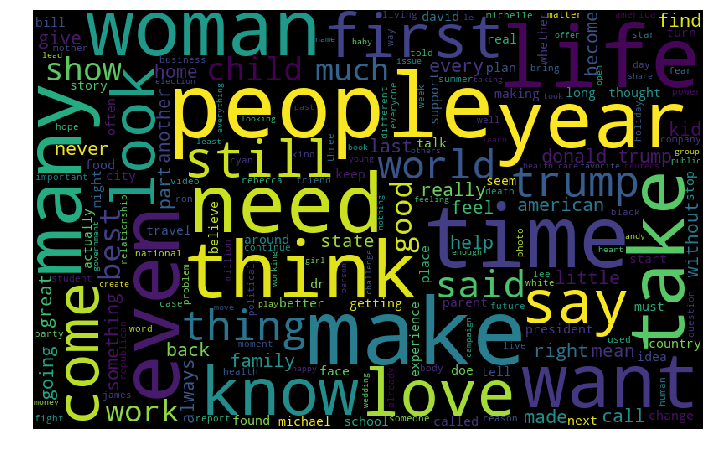

In [237]:
all_words = ' '.join([text for text in df_original['hd_short']])

from wordcloud import WordCloud

plt.figure(figsize=(12,10))
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()


In [226]:
# svm on Count Vectors
accuracy = train_model(svm.SVC(kernel='linear'), xtrain_count, train_y, xvalid_count)
print("SVM, Count Vectors: ", accuracy)

# svm on Word Level TF IDF Vectors
accuracy = train_model(svm.SVC(kernel='linear'), xtrain_tfidf, train_y, xvalid_tfidf)
print("LR, WordLevel TF-IDF: ", accuracy)

# SVM on Ngram Level TF IDF Vectors
#accuracy = train_model(svm.SVC(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
#print("SVM, N-Gram Vectors: ", accuracy)

# SVM on Character Level TF IDF Vectors
#accuracy = train_model(svm.SVC(), xtrain_tfidf_ngram_chars, train_y, xvalid_tfidf_ngram_chars)
#print("SVM, CharLevel Vectors: ", accuracy)

SVM, Count Vectors:  0.6352896955377759
LR, WordLevel TF-IDF:  0.624550287279171


In [238]:
clf = svm.SVC()
clf.fit(xtrain_count, train_y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [239]:
print("Train svm accuracy", clf.score(xtrain_count, train_y))


Train svm accuracy 0.180146236251197


In [214]:
# Linear Classifier on Count Vectors
accuracy = train_model(linear_model.LogisticRegression(), xtrain_count, train_y, xvalid_count)
print("LR, Count Vectors: ", accuracy)

# Linear Classifier on Word Level TF IDF Vectors
accuracy = train_model(linear_model.LogisticRegression(), xtrain_tfidf, train_y, xvalid_tfidf)
print("LR, WordLevel TF-IDF: ", accuracy)

# Linear Classifier on Ngram Level TF IDF Vectors
#accuracy = train_model(linear_model.LogisticRegression(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
#print("LR, N-Gram Vectors: ", accuracy)

# Linear Classifier on Character Level TF IDF Vectors
#accuracy = train_model(linear_model.LogisticRegression(), xtrain_tfidf_ngram_chars, train_y, xvalid_tfidf_ngram_chars)
#print("LR, CharLevel Vectors: ", accuracy)

LR, Count Vectors:  0.6691188315523815
LR, WordLevel TF-IDF:  0.6207914943886592


In [222]:
# RF on Count Vectors
accuracy = train_model(ensemble.RandomForestClassifier(), xtrain_count, train_y, xvalid_count)
print("RF, Count Vectors: ", accuracy)

# RF on Word Level TF IDF Vectors
accuracy = train_model(ensemble.RandomForestClassifier(), xtrain_tfidf, train_y, xvalid_tfidf)
print("RF, WordLevel TF-IDF: ", accuracy)

# RF on Ngram Level TF IDF Vectors
#accuracy = train_model(ensemble.RandomForestClassifier(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
#print("RF, N-Gram Vectors: ", accuracy)

# RF on Character Level TF IDF Vectors
#accuracy = train_model(ensemble.RandomForestClassifier(), xtrain_tfidf_ngram_chars, train_y, xtrain_tfidf_ngram_chars)
#print("RF, CharLevel Vectors: ", accuracy)


RF, Count Vectors:  0.5314127691564194
RF, WordLevel TF-IDF:  0.5386618697309778


In [223]:
# Extereme Gradient Boosting on Count Vectors
accuracy = train_model(xgboost.XGBClassifier(), xtrain_count.tocsc(), train_y, xvalid_count.tocsc())
print("Xgb, Count Vectors: ", accuracy)

# Extereme Gradient Boosting on Word Level TF IDF Vectors
accuracy = train_model(xgboost.XGBClassifier(), xtrain_tfidf.tocsc(), train_y, xvalid_tfidf.tocsc())
print("Xgb, WordLevel TF-IDF: ", accuracy)



C:\Users\ikd\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Xgb, Count Vectors:  0.5309563443054288
Xgb, WordLevel TF-IDF:  0.5251839123664286


C:\Users\ikd\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
